---
# **Autonomous-Anti-Drone-Detection-Classification-System**
---

Data Information:
---
* labels --> Information about objects inside each image.
* data.yaml --> Instructions for YOLO.
* from the images -> YOLO cannot guess where the drone is by itself.
👉 That’s why we need labels.
* Label File:
  * Example lets take one img label info.
  * pic_01.txt: 0 | 0.532 | 0.501 | 0.936 | 0.631
  * --> YOLO label format will be: `<class_id> <x_center> *<y_center> <width> <height>`. All values are normalized (0 to 1).
  ---
* What does “normalized” mean?
  * Instead of using pixels: suppose x = 512 pixel.
  * YOLO uses percentage of image size: x = 0.5 → middle of image.
* Why?
  * Works for any image size.
  * Faster training.
  * Hardware independent.
  ---
* How YOLO Uses Labels
  * During training:
    * 1. YOLO sees an image.
    * 2. YOLO predicts a box.
    * 3. YOLO compares prediction with label.
    * 4. YOLO calculates error (loss).
    * 5. YOLO updates weights.
    * Repeats it thousands of times/
    ---
* How labels are created ?

Labels are created by humans drawing boxes around objects and converting those boxes into numbers that YOLO understands.

* Step A: We use Common annotation tools:
  
  * Roboflow (easiest)
  * CVAT
  * LabelImg
  * Labelme


  



---

# **1. Install Required Libraries**

In [1]:
!pip install -q roboflow
!pip install -q ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.5 MB/s eta 0:00:00


---
# **2. Download Dataset from Roboflow**
---

In [2]:
from google.colab import userdata
from roboflow import Roboflow

api_key = userdata.get("ROBOFLOW_API_KEY")

rf = Roboflow(api_key= api_key)
project = rf.workspace("anti-drone-detection").project("anti-drone-detection-system")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Anti-Drone-Detection-System--1 in yolov11:: 100%|██████████| 11474/11474 [00:08<00:00, 1429.79it/s]


# **3. Verify Dataset Structure**

In [3]:
!ls Anti-Drone-Detection-System--1 | head
print("-"*100)
!cat Anti-Drone-Detection-System--1/train/labels/-de-gaviotas-de-pC3A1jaros-voladores-sobre-fondo-blanco-inspiradora-tinta-de_jpg.rf.83531b6eb78ee6641fb095a0c80c1f63.txt | head


data.yaml
README.dataset.txt
README.roboflow.txt
test
train
valid
----------------------------------------------------------------------------------------------------
1 0.67890625 0.0890625 0.1515625 0.1125
1 0.43984375 0.44921875 0.1015625 0.1515625
1 0.2734375 0.9125 0.140625 0.1125
1 0.3078125 0.7125 0.159375 0.128125
1 0.48515625 0.17265625 0.1578125 0.1015625
1 0.2578125 0.521875 0.13125 0.1
1 0.3296875 0.29765625 0.115625 0.1578125
1 0.5171875 0.62734375 0.153125 0.1046875
1 0.58984375 0.296875 0.1421875 0.1
1 0.475 0.49921875 0.565625 0.9359375

In [8]:
!cat Anti-Drone-Detection-System--1/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['aircraft - v1 2022-08-19 8-46pm', 'bird', 'c-helicopter', 'drone']

roboflow:
  workspace: anti-drone-detection
  project: anti-drone-detection-system
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/anti-drone-detection/anti-drone-detection-system/dataset/1

---
# **4. Correct data.yaml**
---

In [3]:
import yaml

yaml_data = {
    'path': 'Anti-Drone-Detection-System--1',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 4,                # No.of classes
    'names': ['aircraft', 'bird', 'helicopter', 'drone']
}           # ID's :- aircraft -> 0, bird -> 1, helicopter -> 2, 'drone -> 3


with open('Anti-Drone-Detection-System--1/data.yaml', 'w') as file:
    yaml.dump(yaml_data, file)

print("saved to data.yaml")

saved to data.yaml


In [11]:
!cat Anti-Drone-Detection-System--1/data.yaml

names:
- aircraft
- bird
- helicopter
- drone
nc: 4
path: Anti-Drone-Detection-System--1
train: train/images
val: valid/images


---
# **5. No.of Images in each Classes**
---

In [18]:
import glob
labels = glob.glob('Anti-Drone-Detection-System--1/train/labels/*.txt')

image_counts = {}
for f in labels:
    classes = set(line.split()[0] for line in open(f) if line.strip())
    for cls in classes: image_counts[cls] = image_counts.get(cls, 0) + 1

for i, name in enumerate(['aircraft', 'bird', 'helicopter', 'drone']):
    print(f"{name} --> {image_counts.get(str(i), 0)} images")


aircraft --> 1047 images
bird --> 1088 images
helicopter --> 1060 images
drone --> 1112 images


---
# **6. Import Required Libraries**
---

In [6]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


---
# **7. Load YOLOv11m pre-trained Model**
---

In [6]:
# Load YOLOv11m pre-trained Model

model = YOLO('yolo11m.pt')


---
# **8. Train Model on Custom Dataset**
---

In [ ]:
#  Train the YOLO model on custom dataset
model.train(
    data="Anti-Drone-Detection-System--1/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    patience=15,
    workers=8,
    device=0
)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Anti-Drone-Detection-System--1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, pl

In [ ]:
model = YOLO("last.pt")

model.train(
    data="Anti-Drone-Detection-System--1/data.yaml",
    resume=True,
    epochs=100,
    imgsz=640,
    batch=16,
    patience=15,
    workers=8,
    device=0
)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Anti-Drone-Detection-System--1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=last.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5c6ec38620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

---
# **9. Load Best Model**
---

In [7]:
model = YOLO("best.pt")
model.info()

YOLO11m summary: 232 layers, 20,056,092 parameters, 0 gradients, 68.2 GFLOPs


(232, 20056092, 0, 68.2015232)

---
# **10. Visualize Training Results**
---

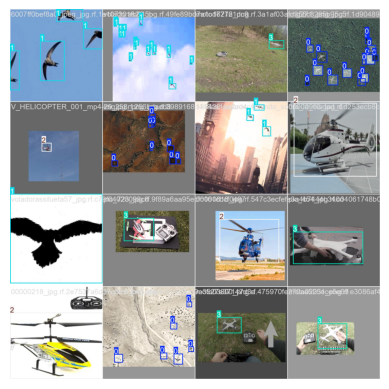

In [ ]:
# Check Training Performance
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/train/train_batch24300.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


---
# **11. Perform Infernce**
---
## use the best YOLO model to detect objects in the image.
---

YOLO11m summary: 232 layers, 20,056,092 parameters, 0 gradients, 68.2 GFLOPs

0: 384x640 1 drone, 2233.3ms
Speed: 8.2ms preprocess, 2233.3ms inference, 72.5ms postprocess per image at shape (1, 3, 384, 640)


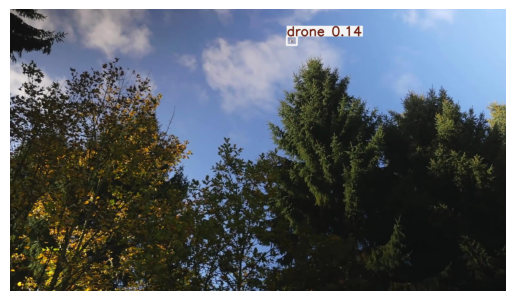

In [ ]:
# Load & Test best model from trainig

image_path = '/content/drive/MyDrive/BirdVsDrone/Drones/172.JPEG'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = model.predict(image, conf = 0.1, iou = 0.5)

# Display the image
annotated_image = result[0].plot()
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

# **12. Batch Inference on Test Dataset**

In [ ]:
# Test on test data

result = model.predict(
    source = "/content/Anti-Drone-Detection-System--1/test/images",
    conf = 0.5,
    iou = 0.5,
    save = True
)


image 1/496 /content/Anti-Drone-Detection-System--1/test/images/00000005_jpg.rf.2483046f256c38ff90813dc278cb9252.jpg: 640x640 1 helicopter, 36.8ms
image 2/496 /content/Anti-Drone-Detection-System--1/test/images/00000029_jpg.rf.c9a6e7e09b21aff2af398426f9f891d8.jpg: 640x640 1 helicopter, 36.8ms
image 3/496 /content/Anti-Drone-Detection-System--1/test/images/00000033_jpg.rf.f2a5fdb8101c6ed4a1b94d6db3d0289f.jpg: 640x640 1 helicopter, 36.8ms
image 4/496 /content/Anti-Drone-Detection-System--1/test/images/00000041_jpg.rf.25838041419e02f4e83c83fee76f32fc.jpg: 640x640 1 helicopter, 36.8ms
image 5/496 /content/Anti-Drone-Detection-System--1/test/images/00000051_jpeg_jpg.rf.bb008ec26ce8fb918a4501fff4444359.jpg: 640x640 1 helicopter, 32.5ms
image 6/496 /content/Anti-Drone-Detection-System--1/test/images/00000065_jpg.rf.af8b52521c27d01be0377353d1204f59.jpg: 640x640 1 helicopter, 25.3ms
image 7/496 /content/Anti-Drone-Detection-System--1/test/images/00000083_jpg.rf.e81d9691a649d2a76d3672c7f18d9f41

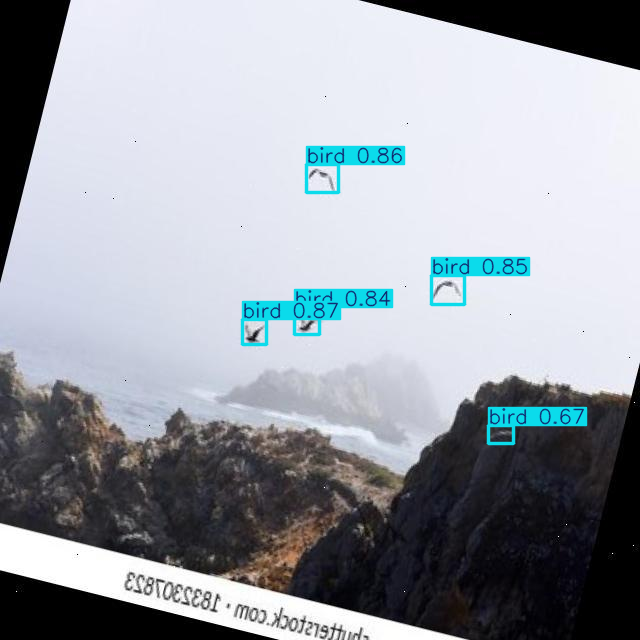

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(result[199].plot())

# **13. Results**

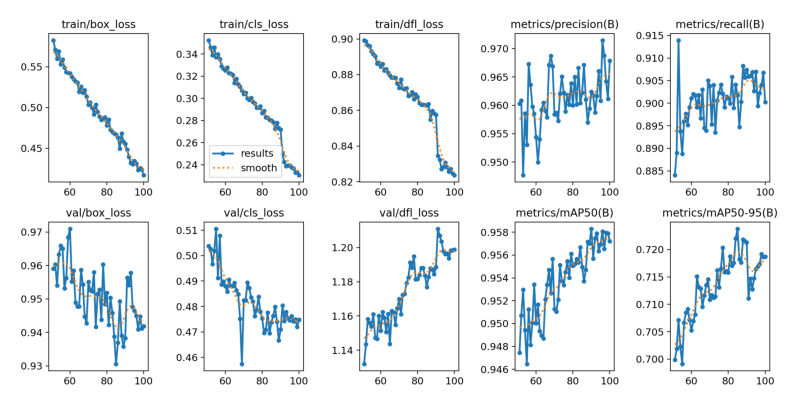

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/runs/detect/train/results.png"
img = Image.open(img_path)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

# **14. Confusion Matrix & PR Curves**

BoxF1_curve.png


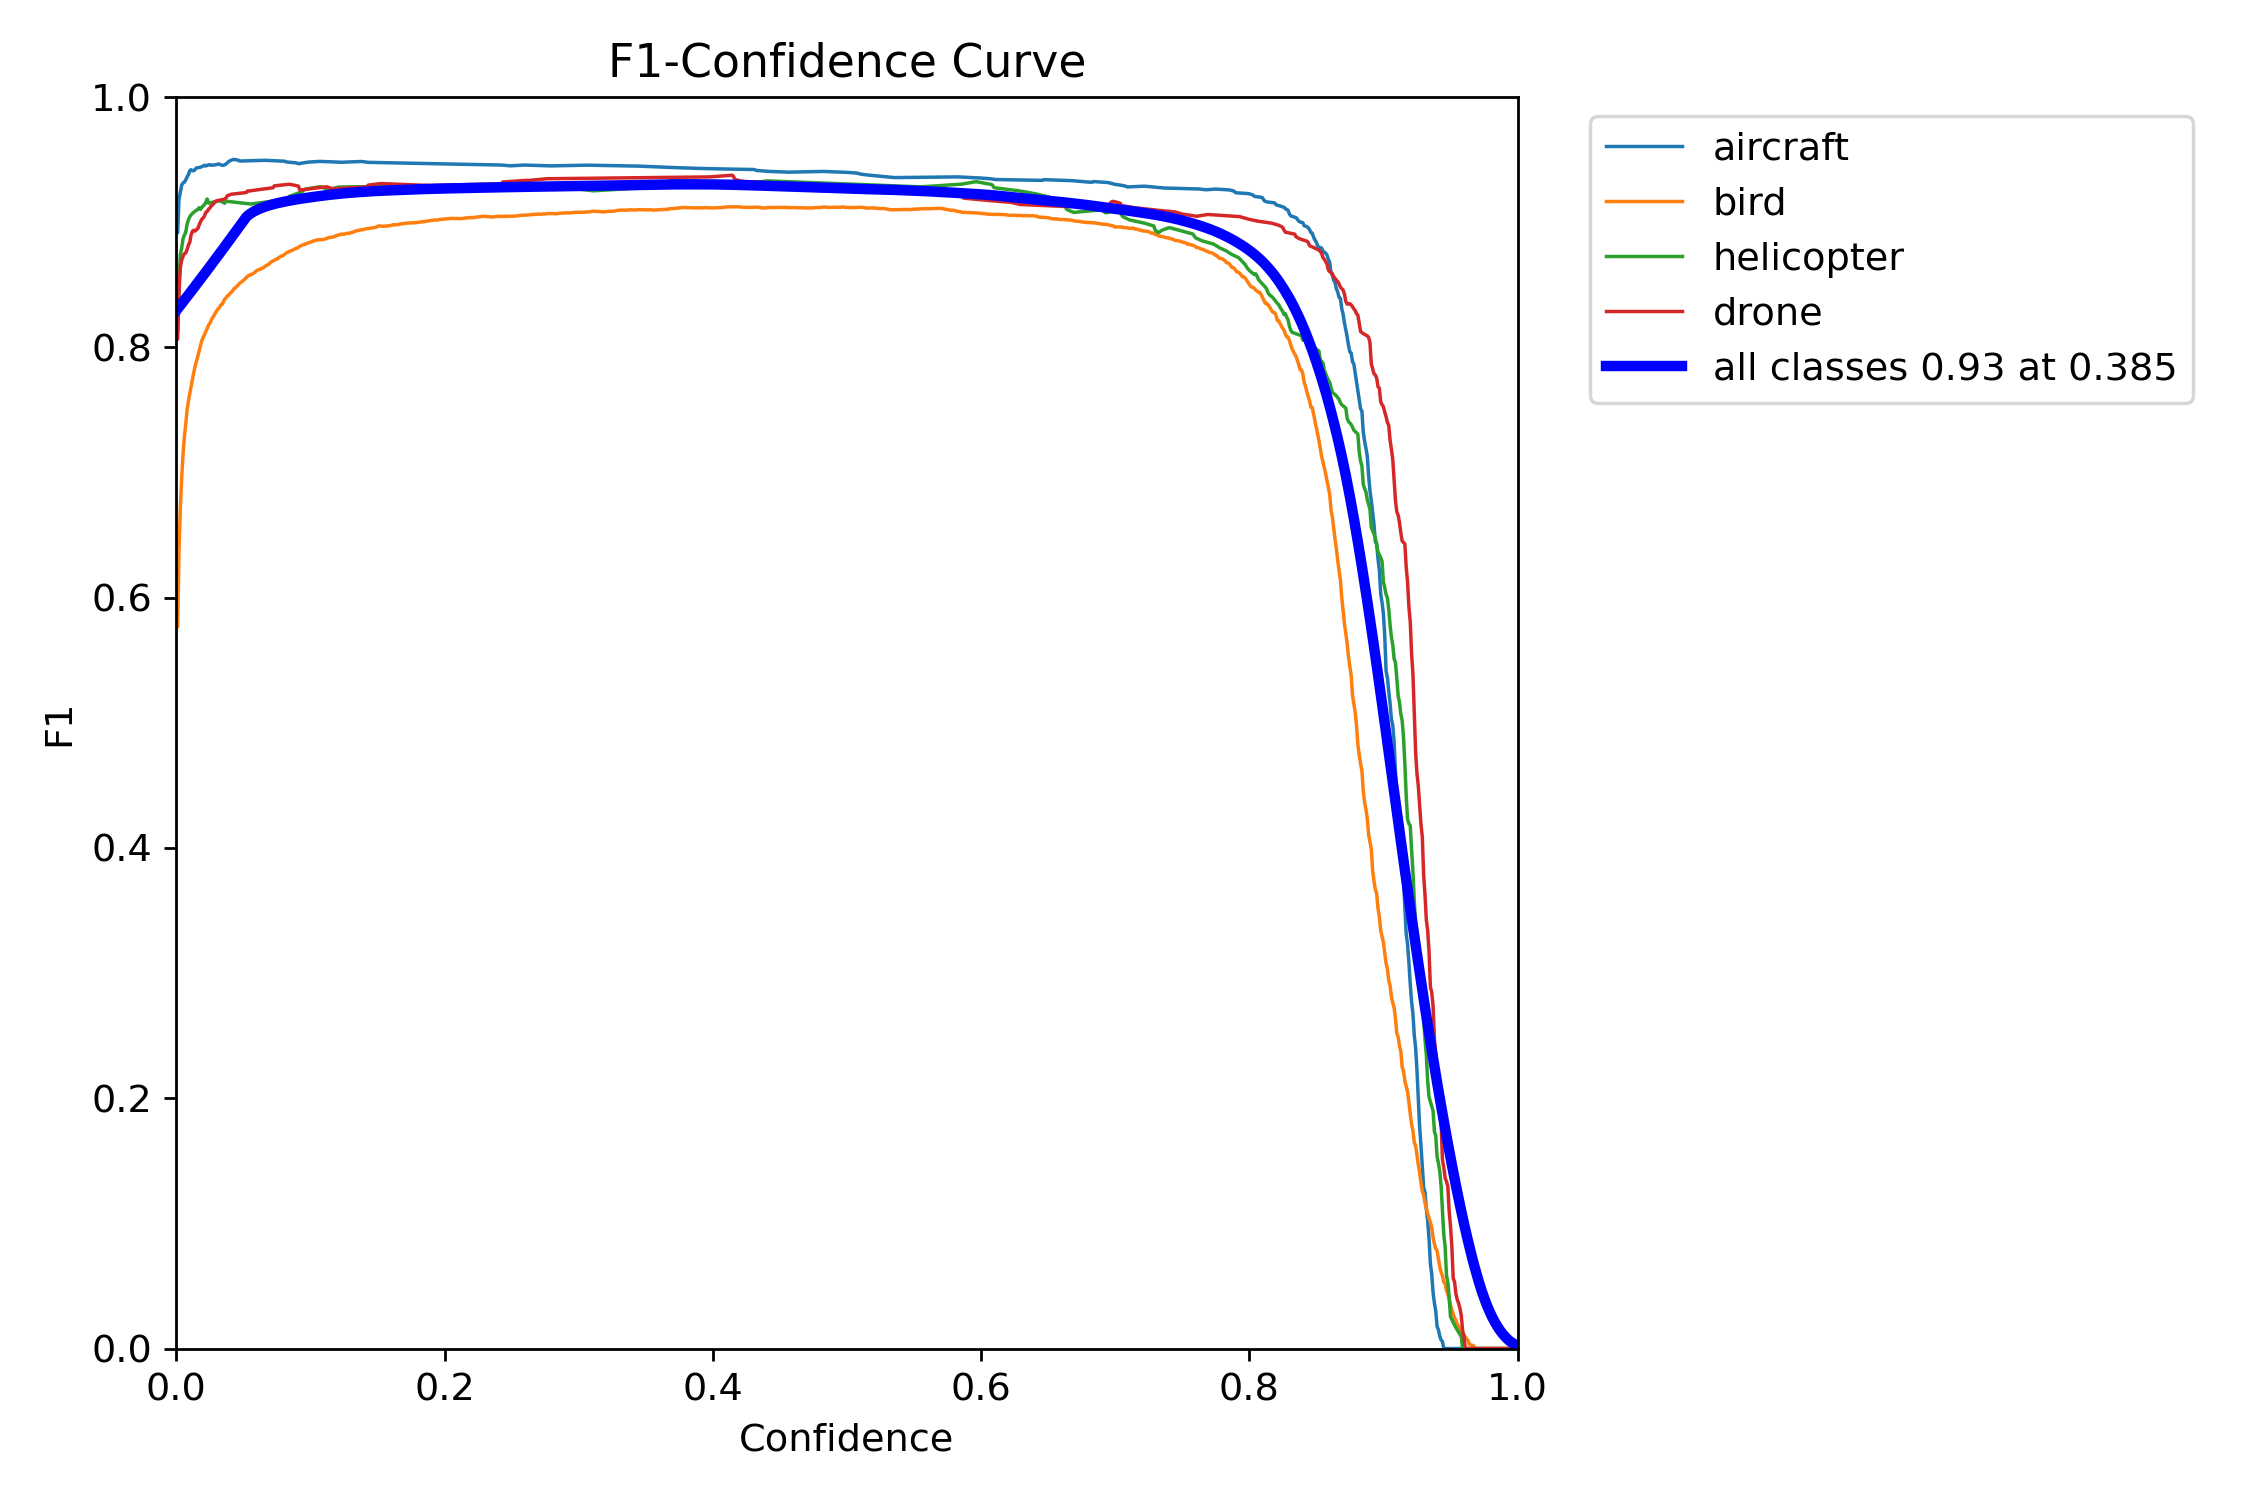

BoxPR_curve.png


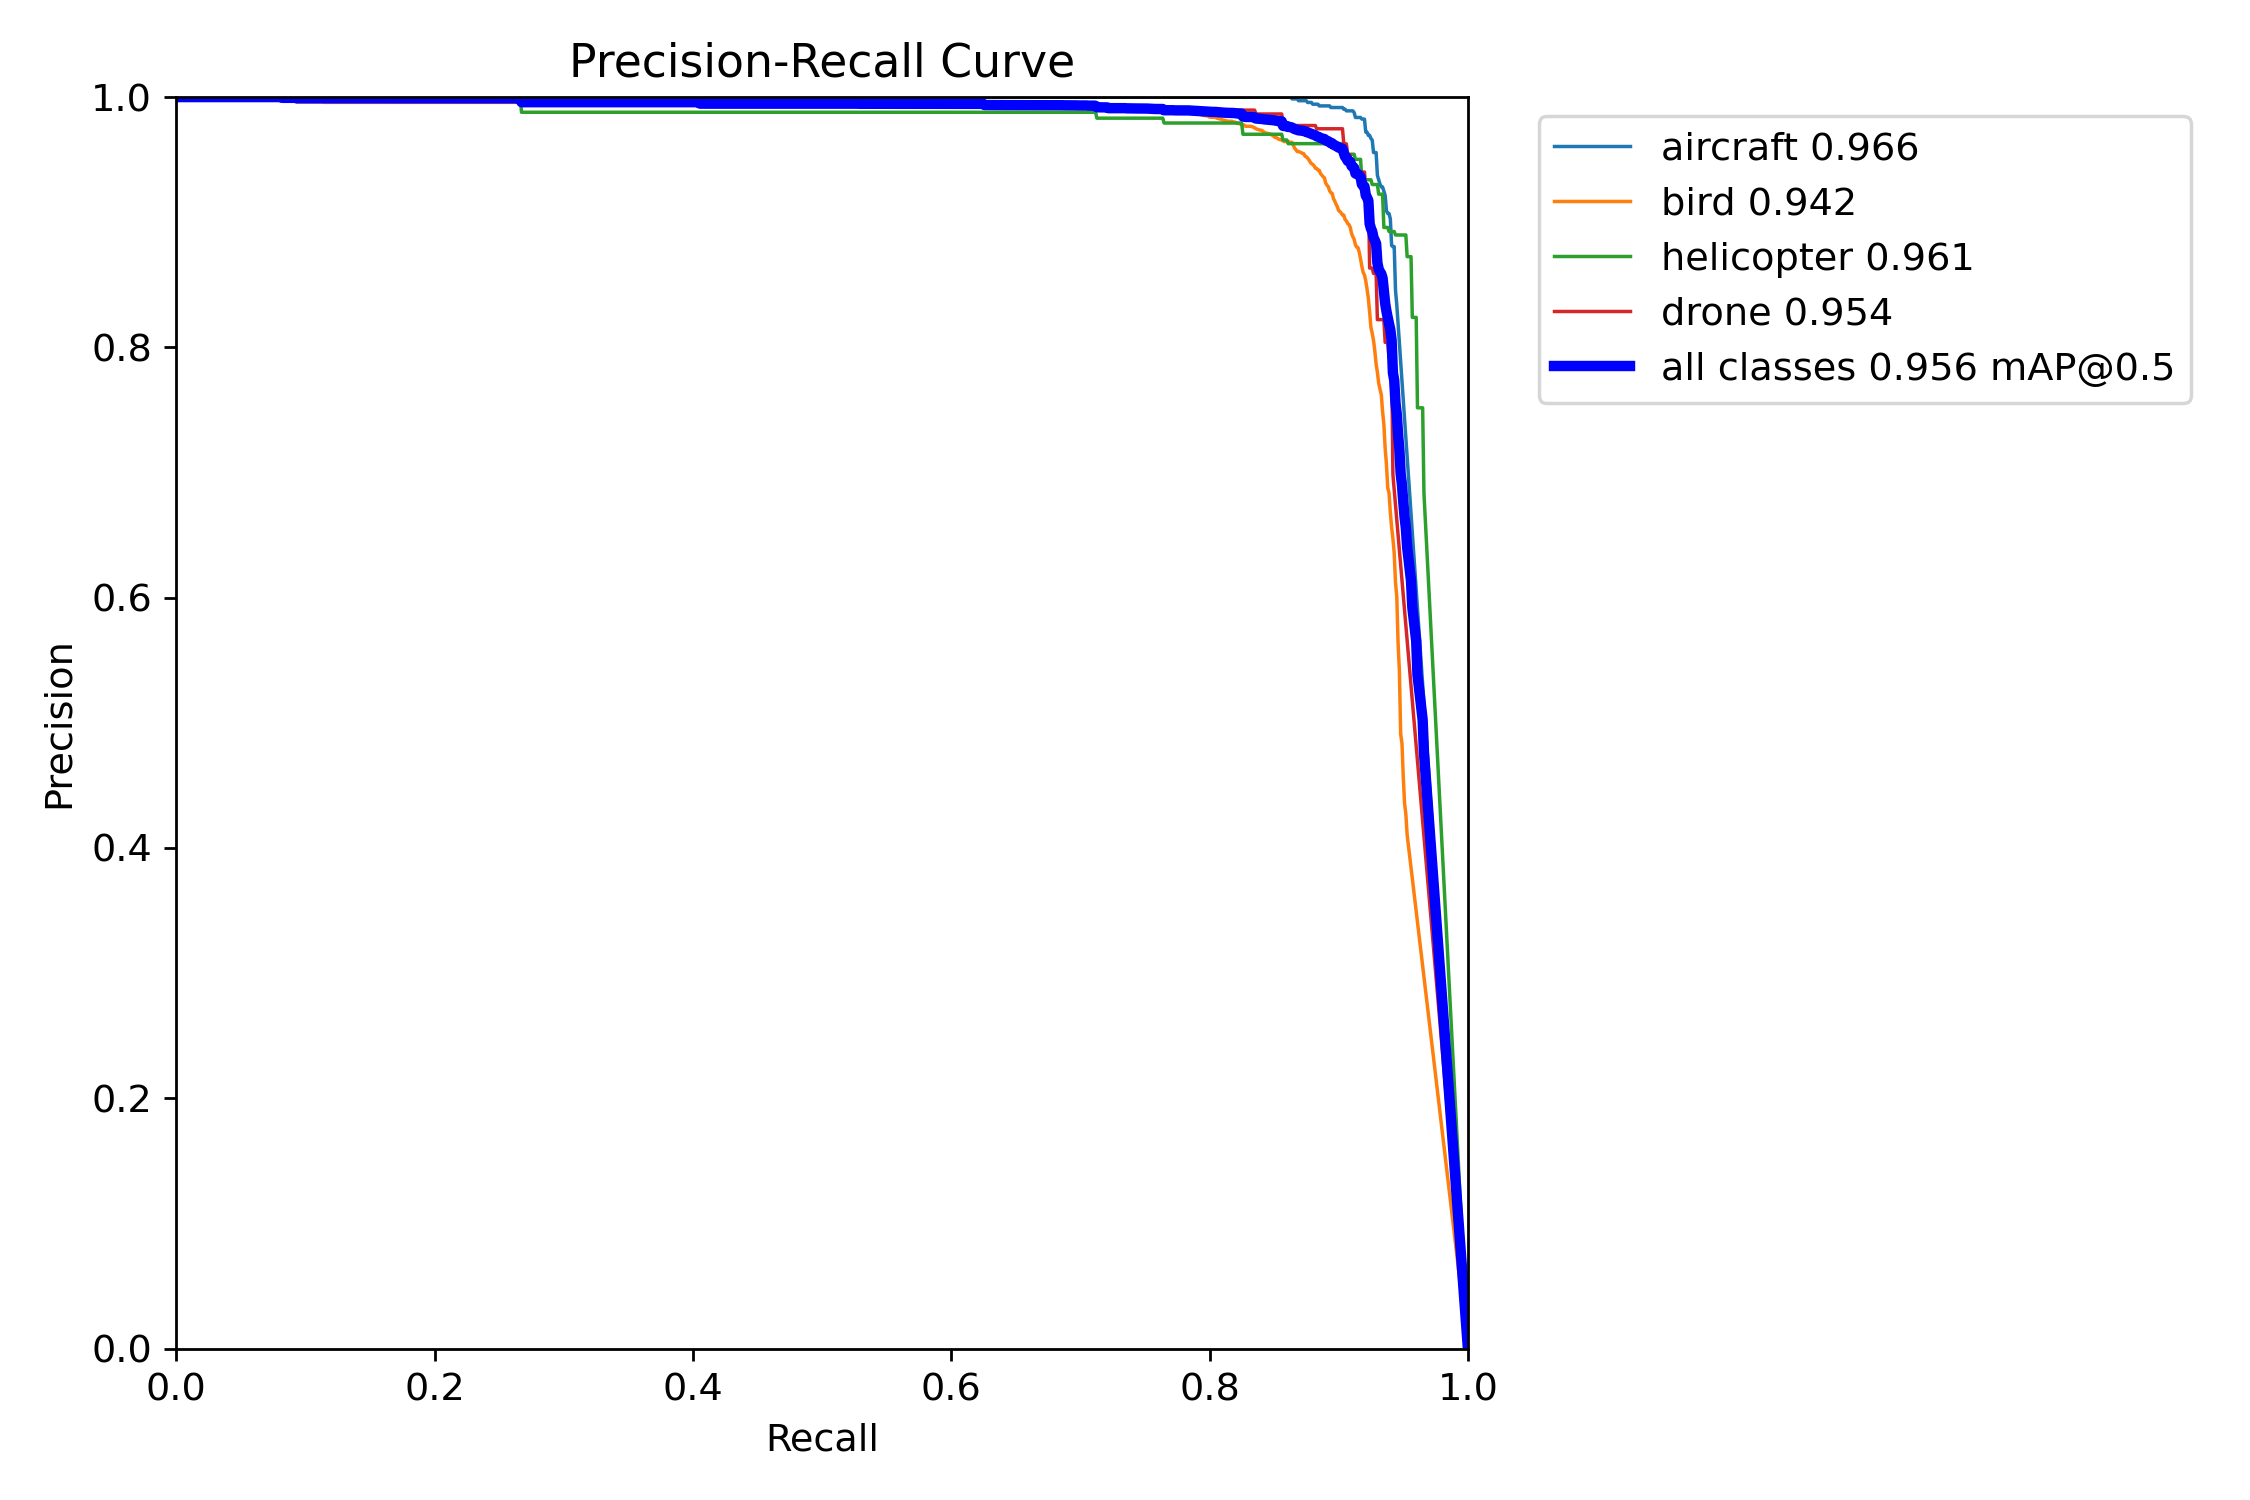

confusion_matrix.png


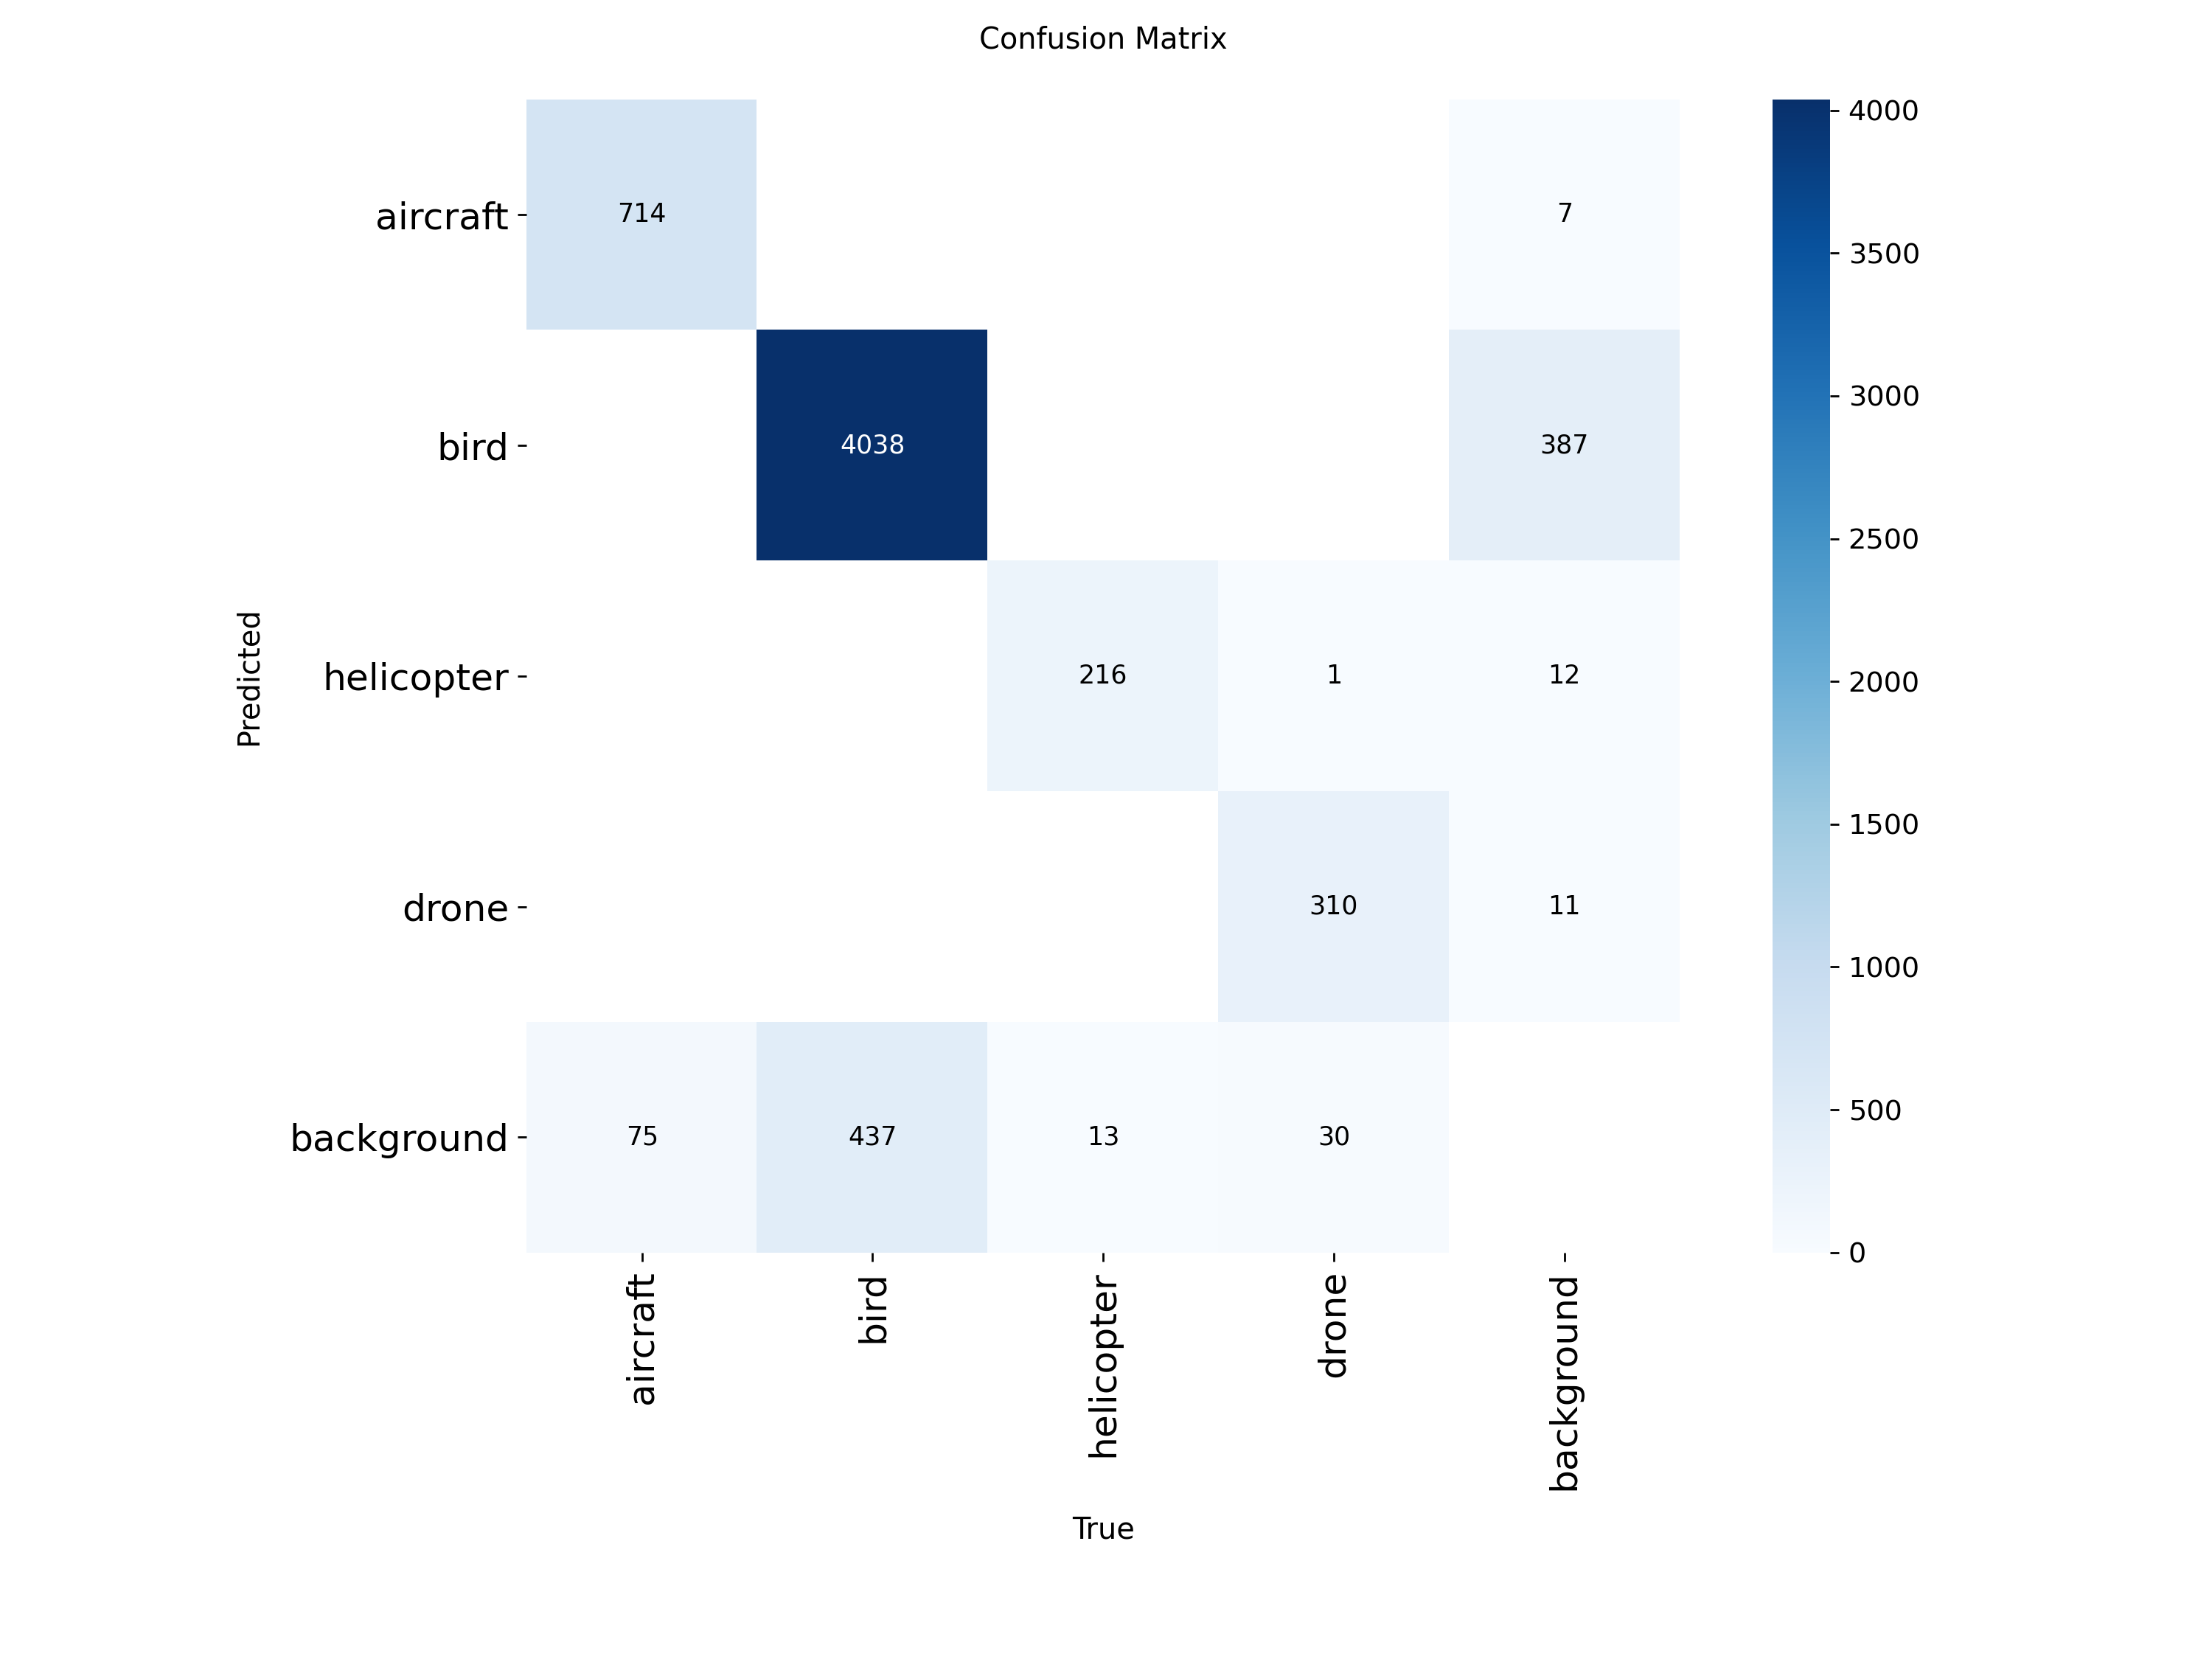

val_batch0_pred.jpg


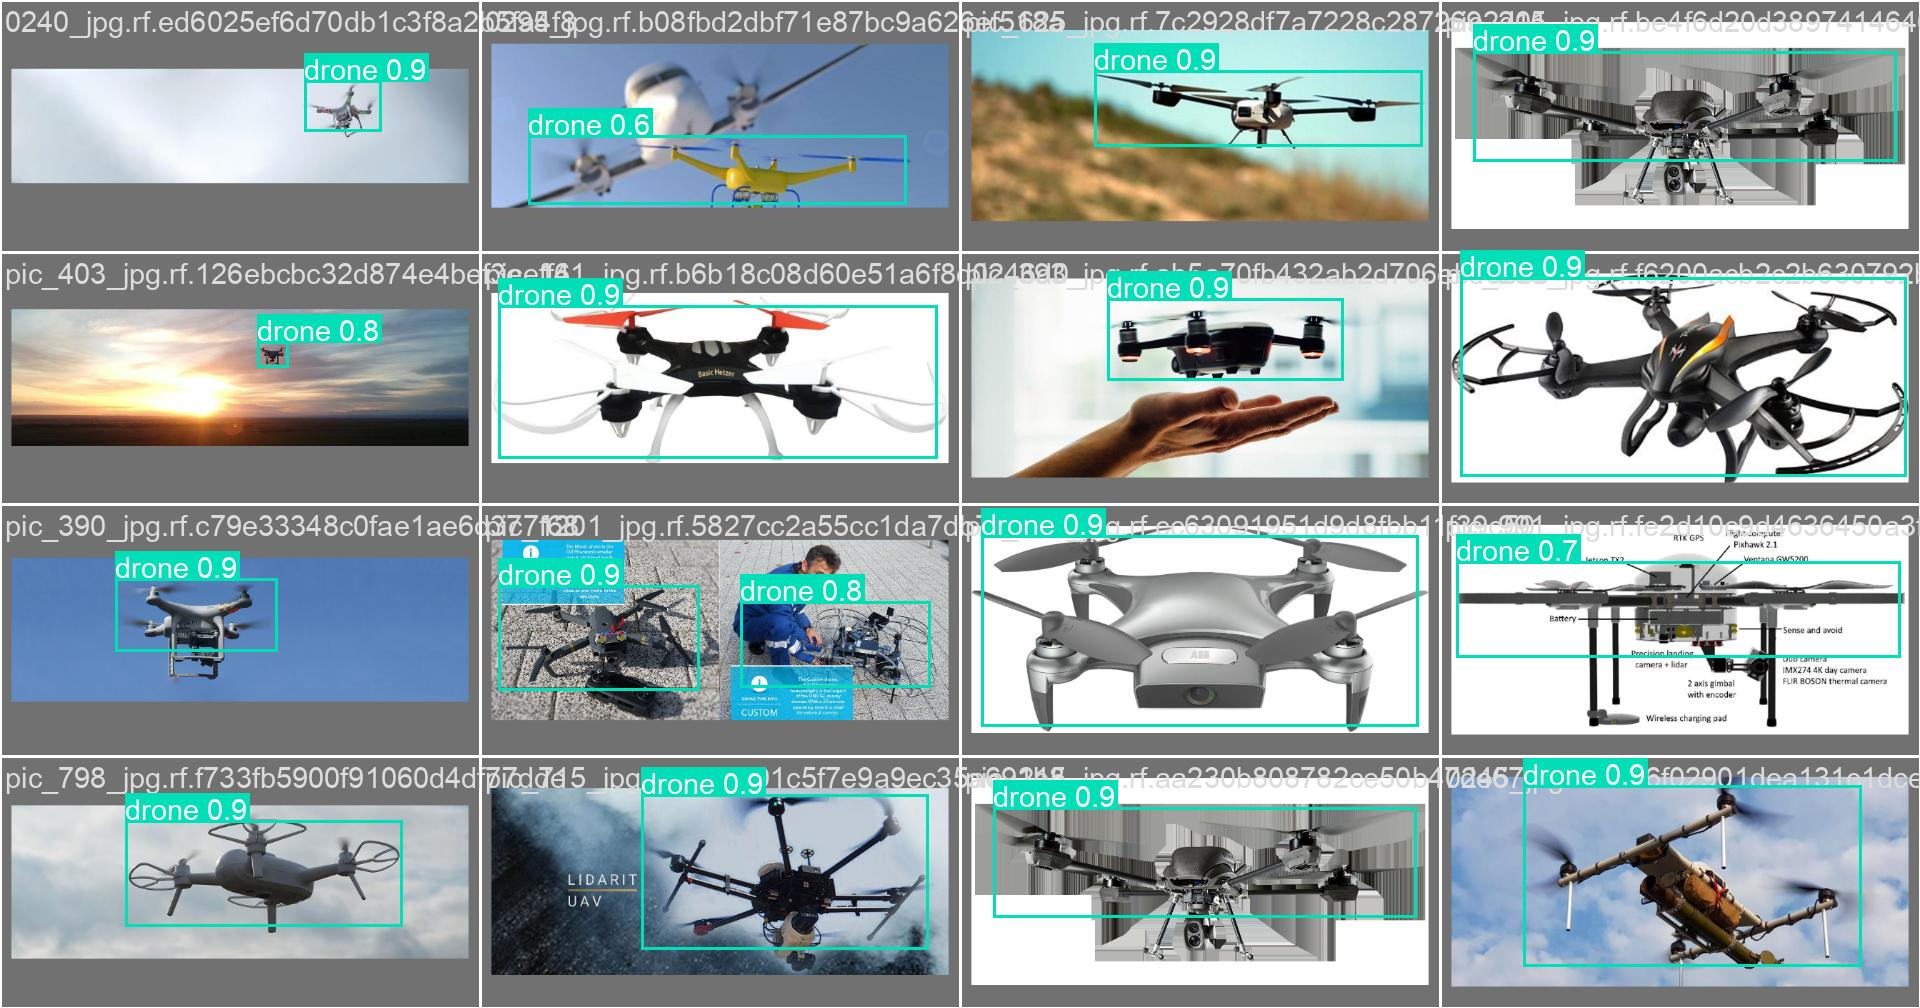

BoxP_curve.png


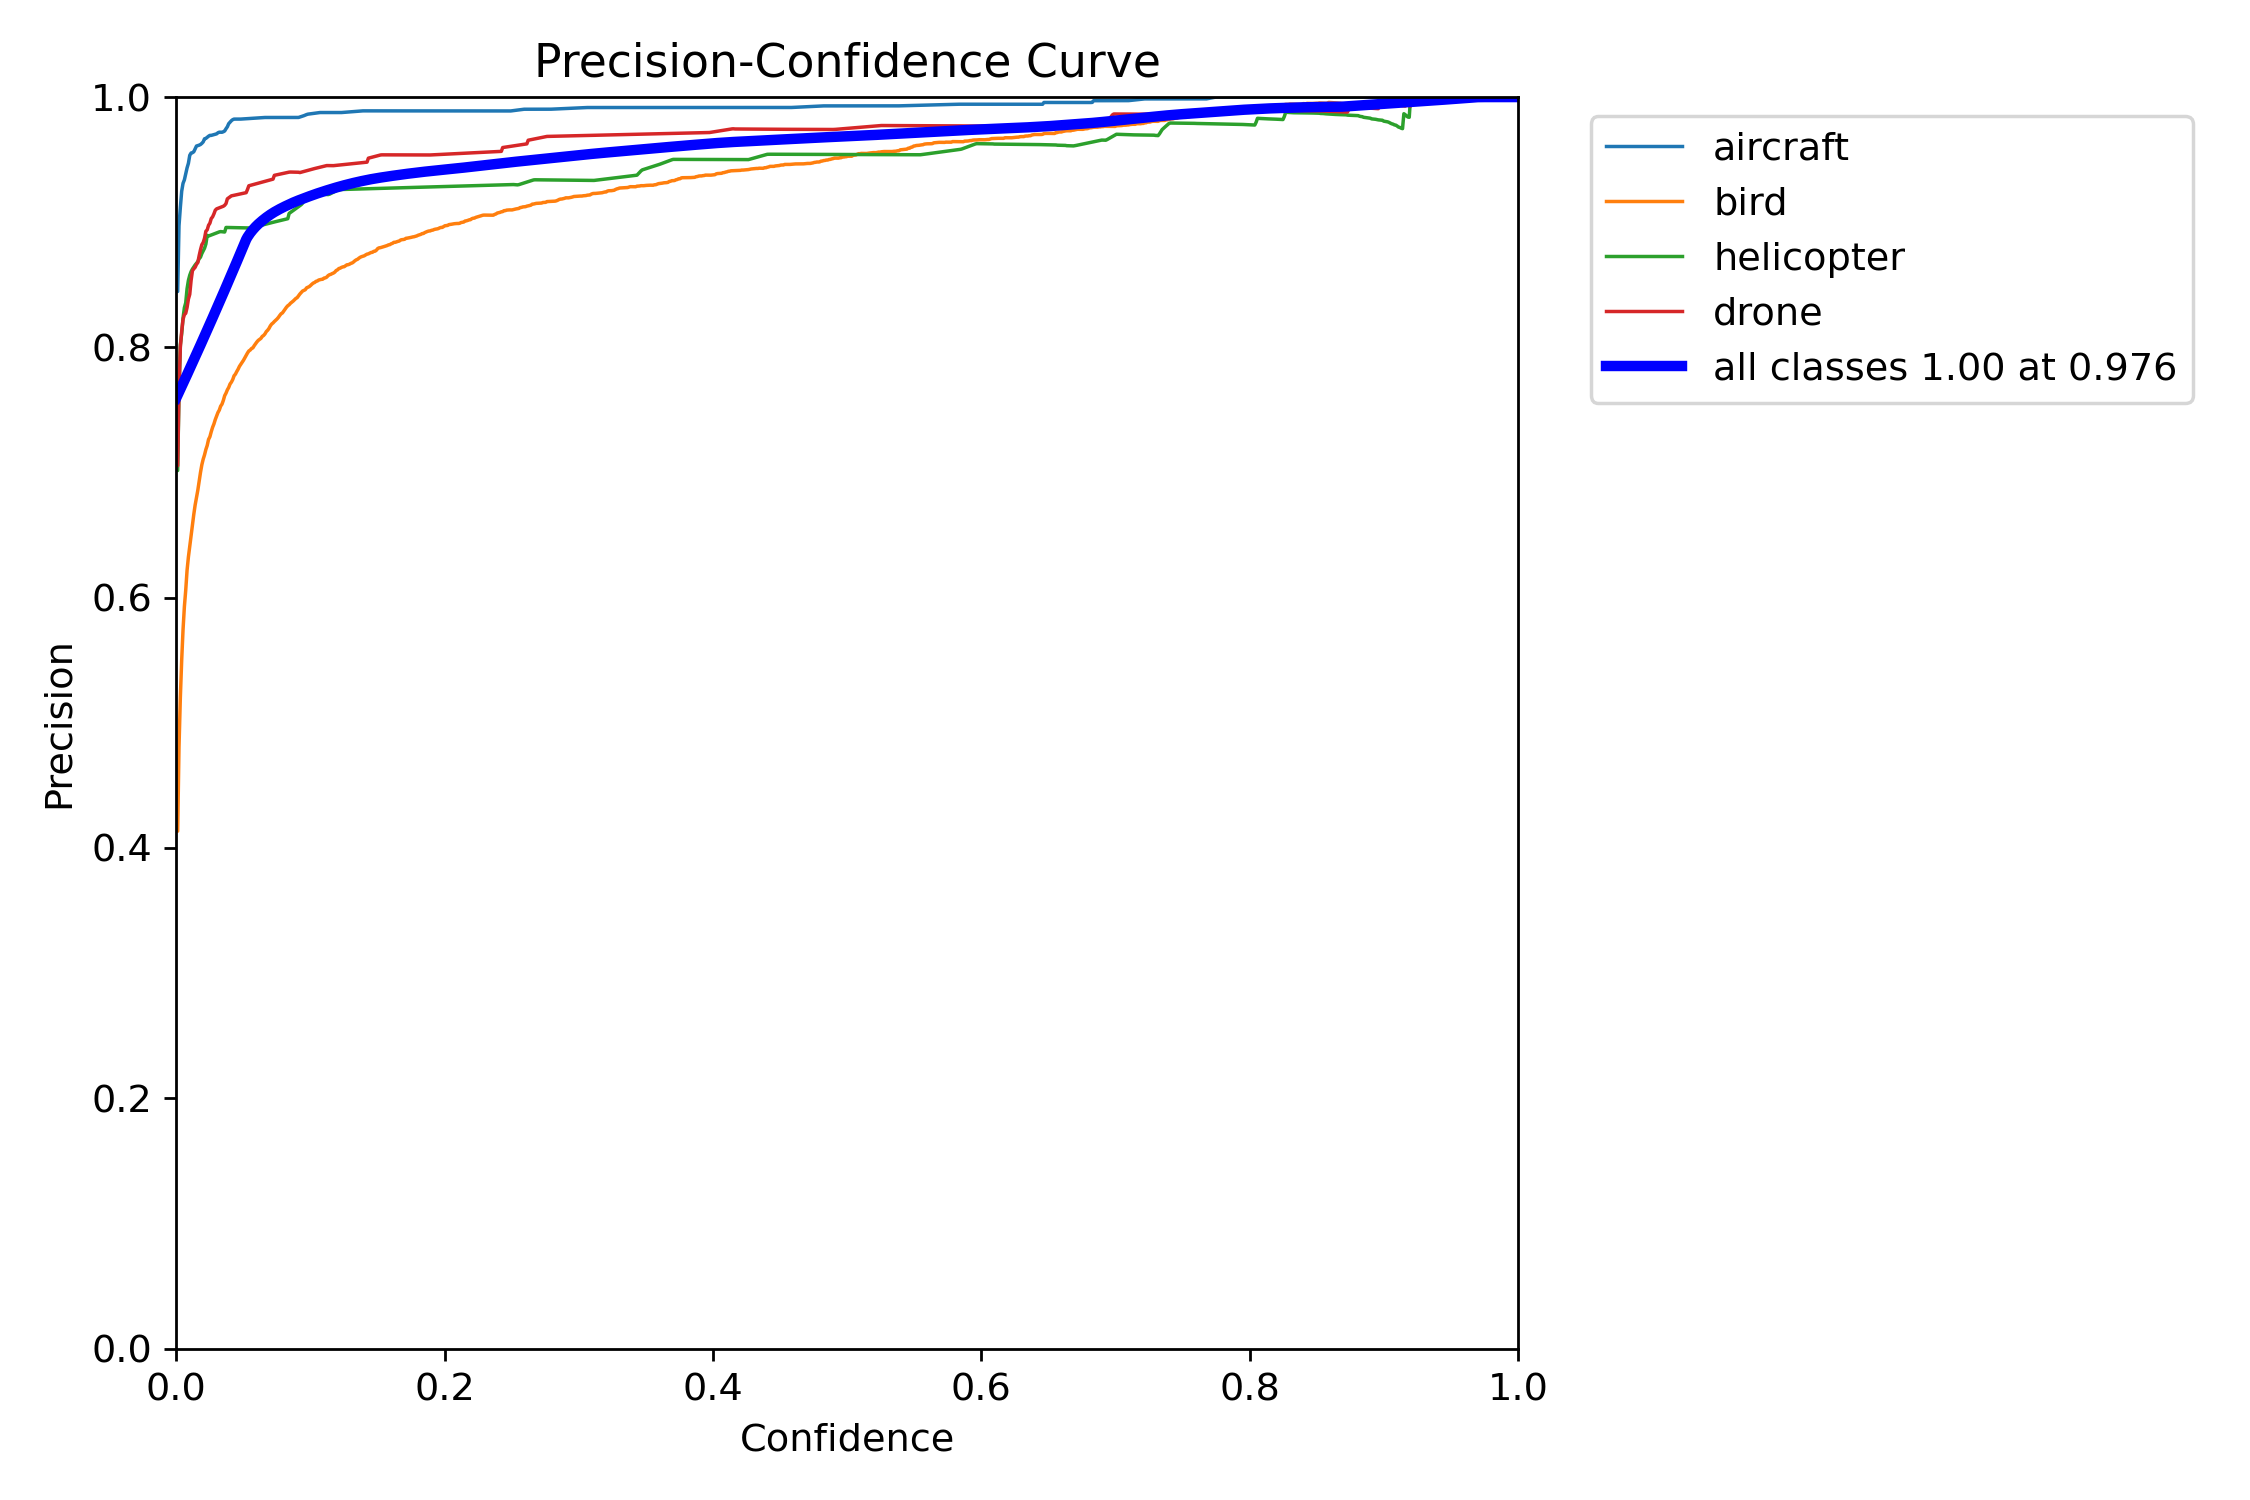

BoxR_curve.png


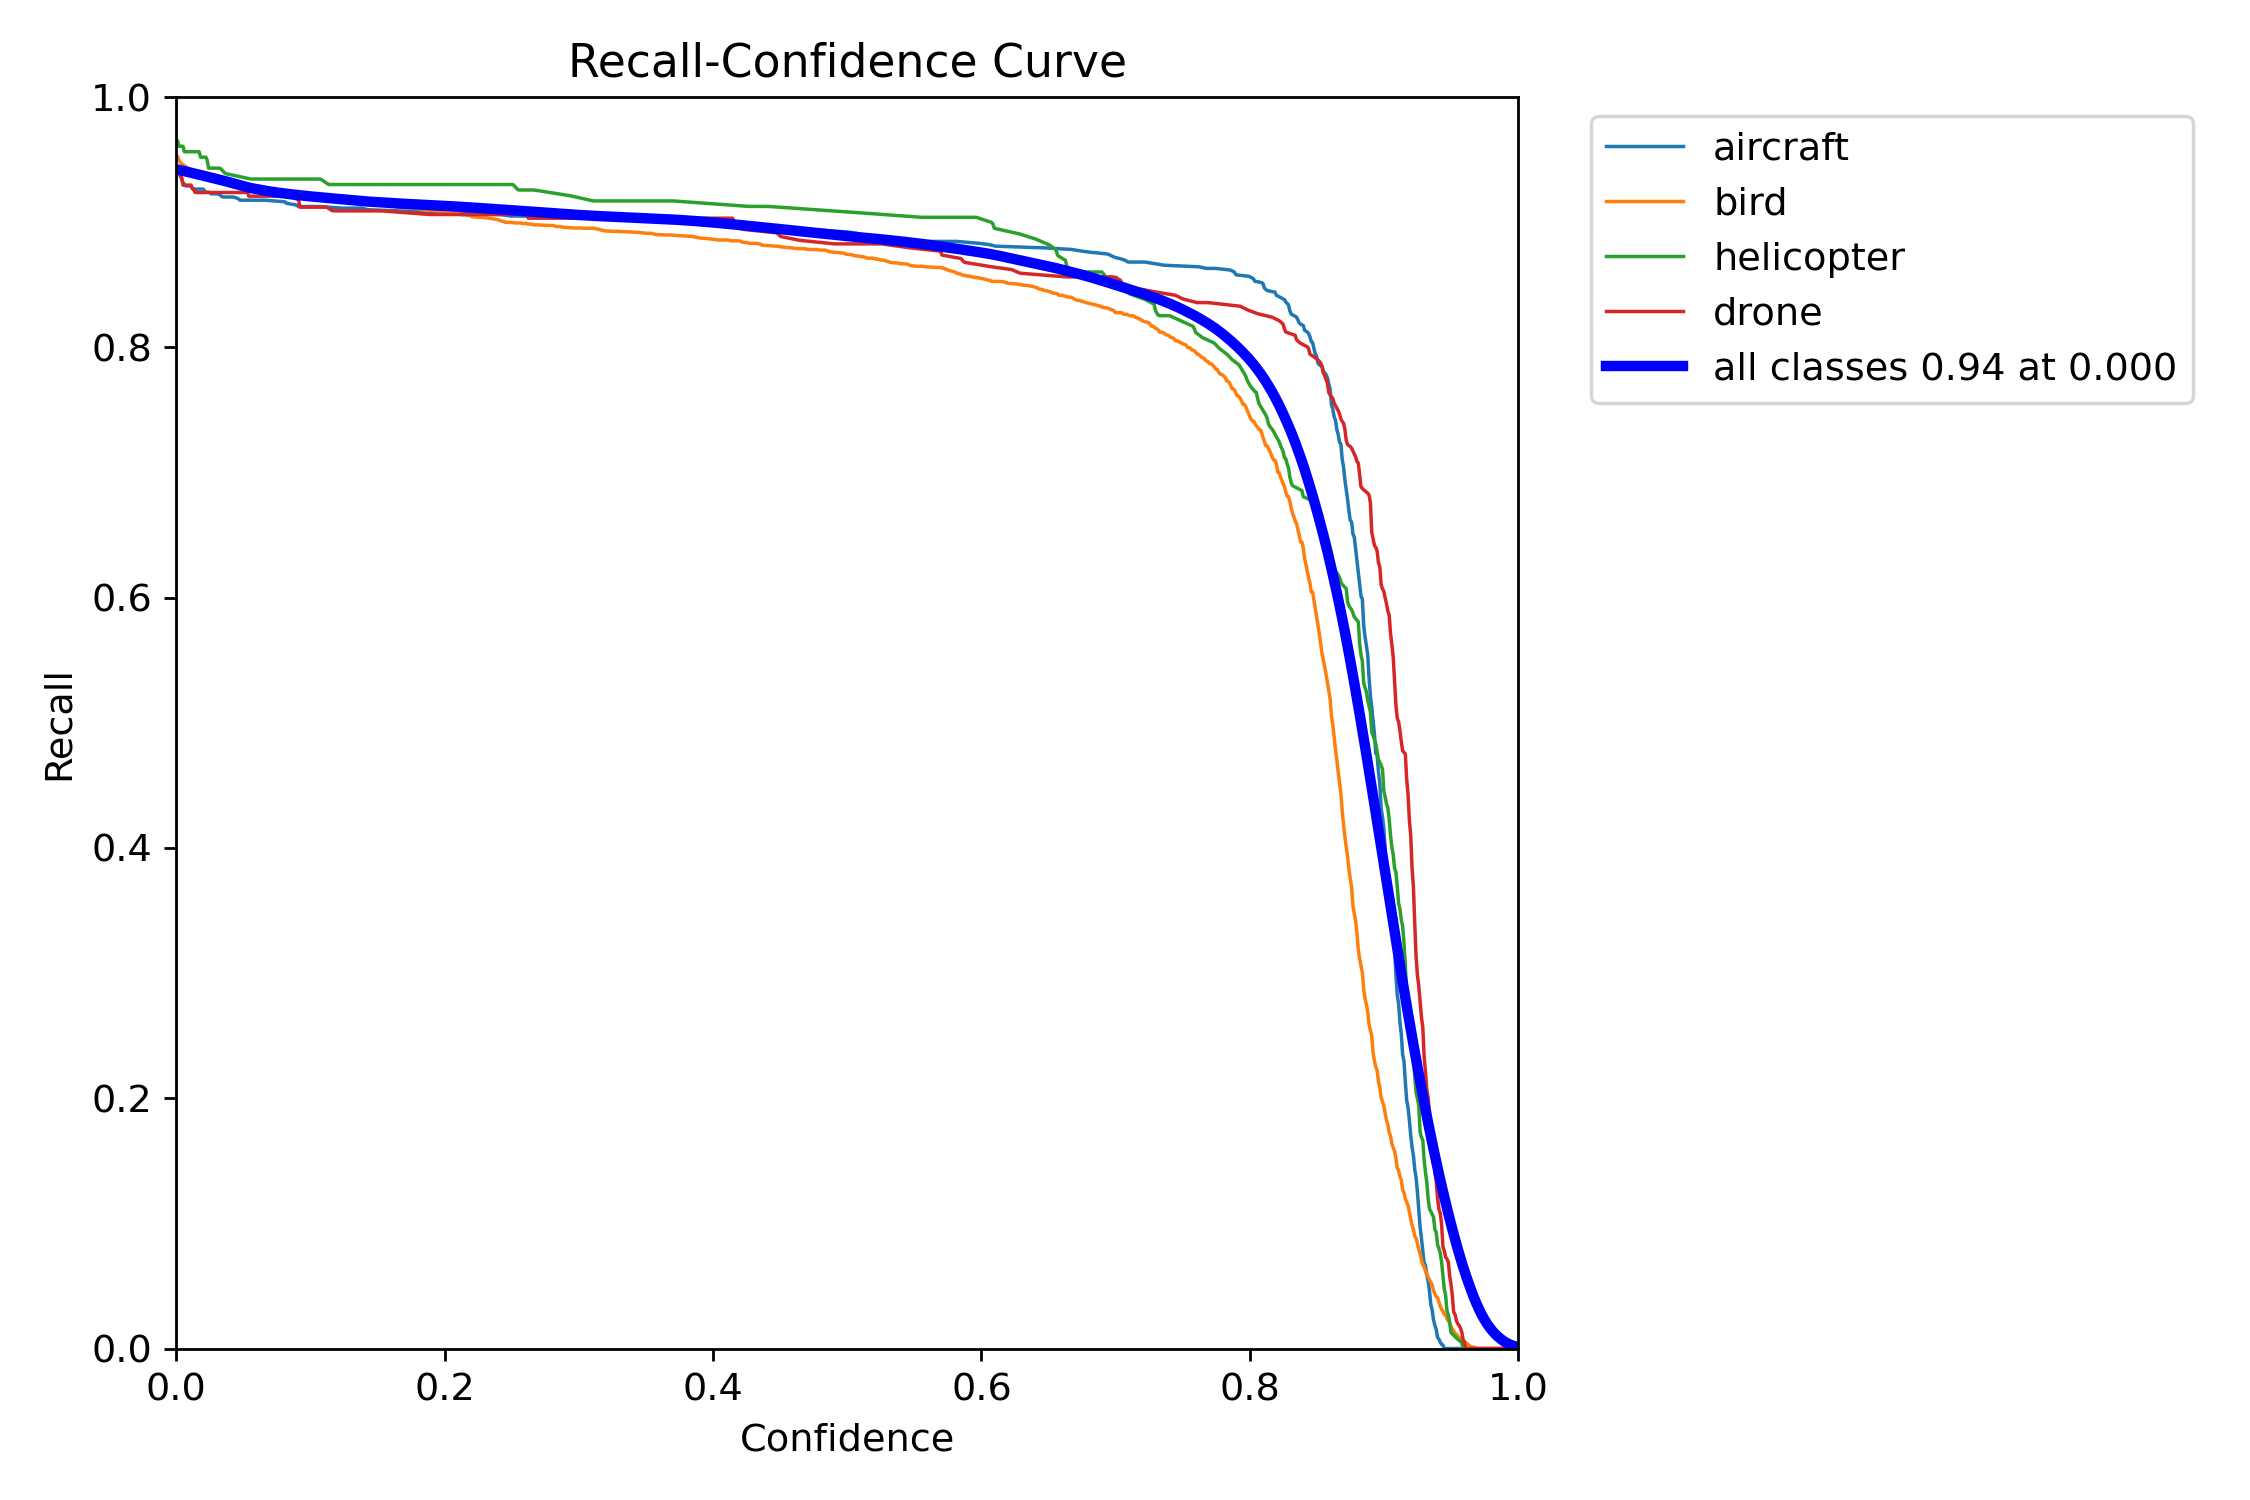

confusion_matrix_normalized.png


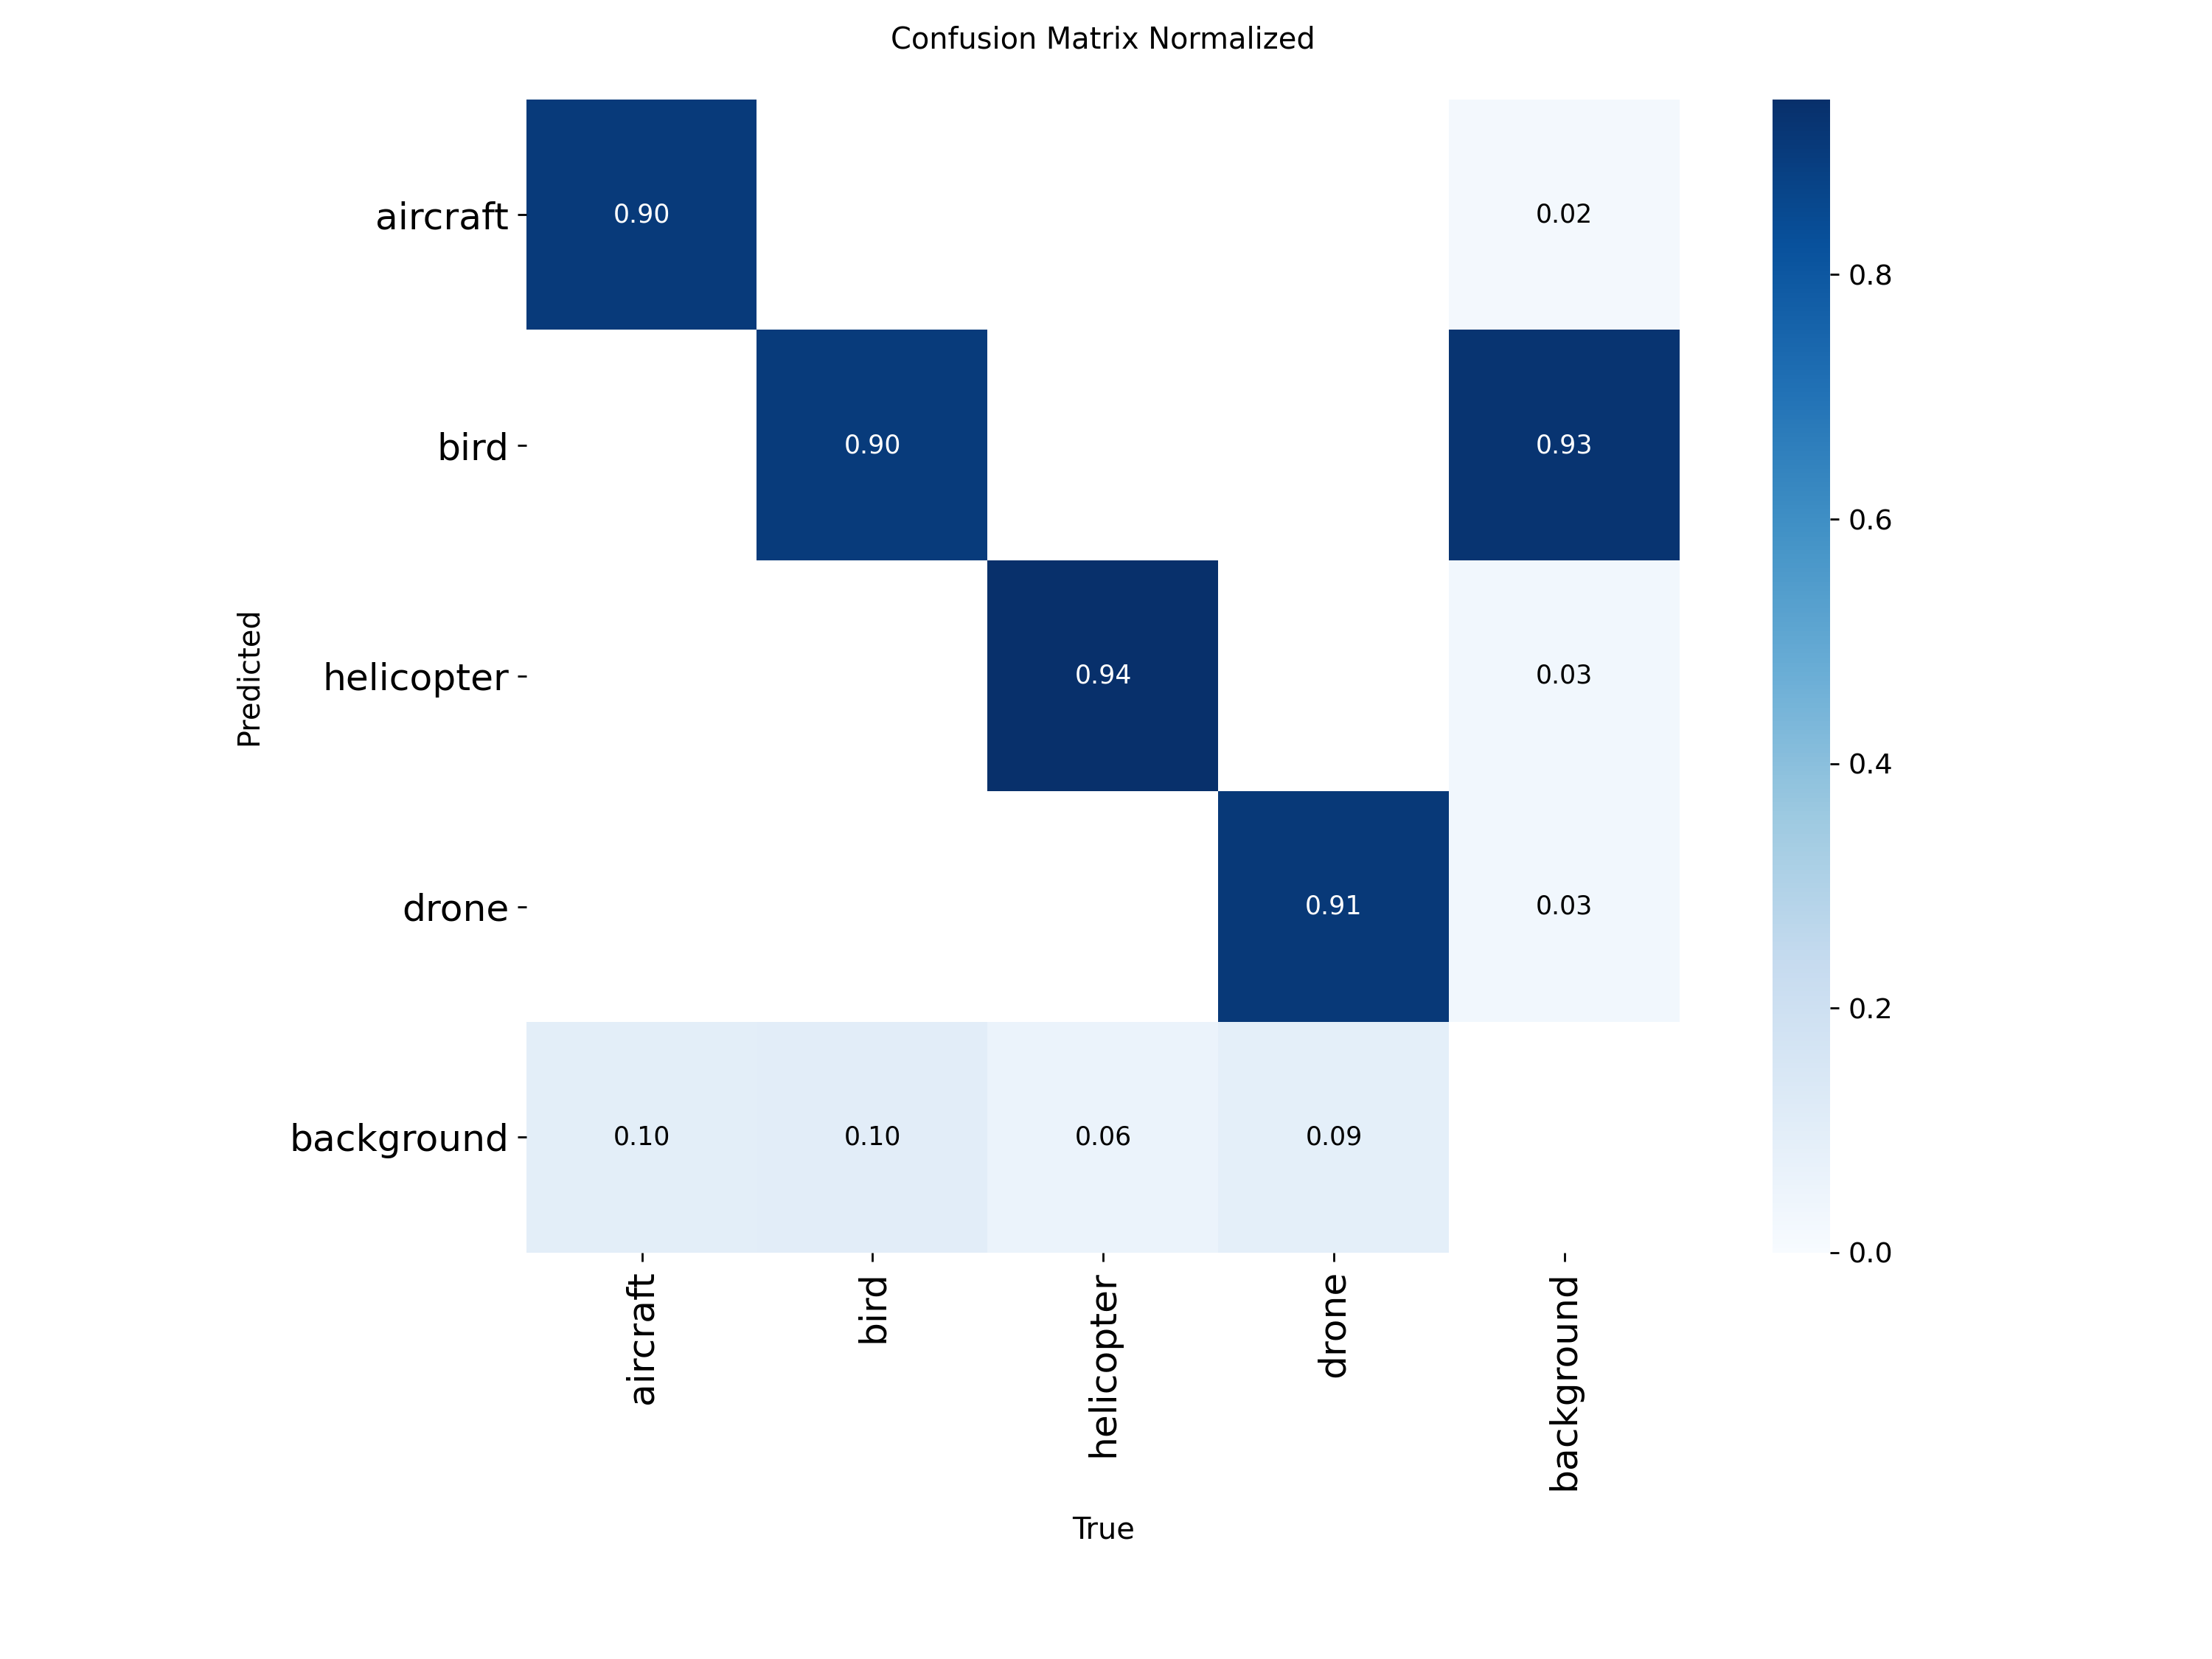

In [ ]:
from IPython.display import Image, display
import os

results_dir = "runs/detect/train/"

plots = [
    "BoxF1_curve.png", "BoxPR_curve.png" ,"confusion_matrix.png", "val_batch0_pred.jpg",
     "BoxP_curve.png", "BoxR_curve.png", "confusion_matrix_normalized.png"
]

for plot in plots:
    plot_path = os.path.join(results_dir, plot)
    if os.path.exists(plot_path):
        print(f"{plot}")
        display(Image(filename=plot_path, width=800))
    else:
        print(f"{plot} not found")


# **15. Results CSV**

In [ ]:
import pandas as pd

df = pd.read_csv('runs/detect/train/results.csv')
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,lr/pg3,lr/pg4,lr/pg5,lr/pg6,lr/pg7
0,51,207.726,0.58274,0.35245,0.89927,0.96026,0.88403,0.94744,0.69984,0.95908,0.50384,1.13202,0.001894,0.000631,0.001894,0.000631,0.001894,0.000631,0.001894,0.000631
1,52,388.245,0.57105,0.34576,0.89861,0.96085,0.88898,0.95071,0.70188,0.96031,0.50269,1.14351,0.001857,0.000619,0.001857,0.000619,0.001857,0.000619,0.001857,0.000619
2,53,567.775,0.56002,0.33899,0.89646,0.94767,0.91395,0.95297,0.70712,0.95398,0.49665,1.15824,0.001819,0.000607,0.001819,0.000607,0.001819,0.000607,0.001819,0.000607
3,54,751.137,0.56916,0.34578,0.89597,0.95854,0.89381,0.94943,0.70228,0.96328,0.50190,1.15600,0.001782,0.000594,0.001782,0.000594,0.001782,0.000594,0.001782,0.000594
4,55,930.486,0.55331,0.33712,0.89303,0.95306,0.88875,0.94647,0.69912,0.96588,0.51051,1.15388,0.001745,0.000582,0.001745,0.000582,0.001745,0.000582,0.001745,0.000582
5,56,1109.940,0.55894,0.33970,0.89138,0.96729,0.89601,0.95124,0.70664,0.96503,0.49115,1.16102,0.001708,0.000569,0.001708,0.000569,0.001708,0.000569,0.001708,0.000569
6,57,1289.810,0.54936,0.33545,0.89029,0.96361,0.89768,0.94813,0.70850,0.95319,0.50786,1.14728,0.001671,0.000557,0.001671,0.000557,0.001671,0.000557,0.001671,0.000557
7,58,1472.740,0.54363,0.32909,0.88608,0.95976,0.89517,0.95007,0.70914,0.95623,0.48868,1.14677,0.001634,0.000545,0.001634,0.000545,0.001634,0.000545,0.001634,0.000545
8,59,1651.100,0.54299,0.32667,0.88672,0.95853,0.89911,0.95343,0.70719,0.96844,0.48984,1.16013,0.001597,0.000532,0.001597,0.000532,0.001597,0.000532,0.001597,0.000532
9,60,1828.780,0.54198,0.32505,0.88453,0.95442,0.90109,0.95004,0.70521,0.97093,0.48805,1.15147,0.001560,0.000520,0.001560,0.000520,0.001560,0.000520,0.001560,0.000520
